# Optimising creal yields in Sub-Saharan Africa in the context of climate change

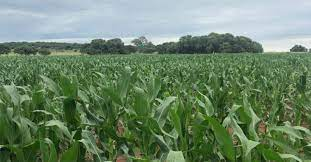

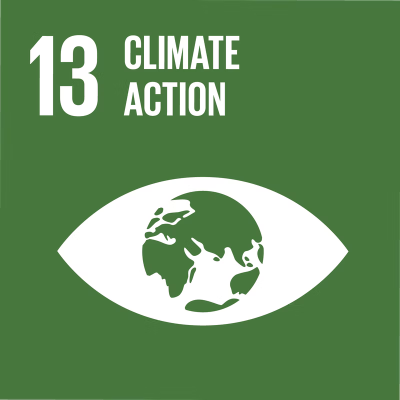

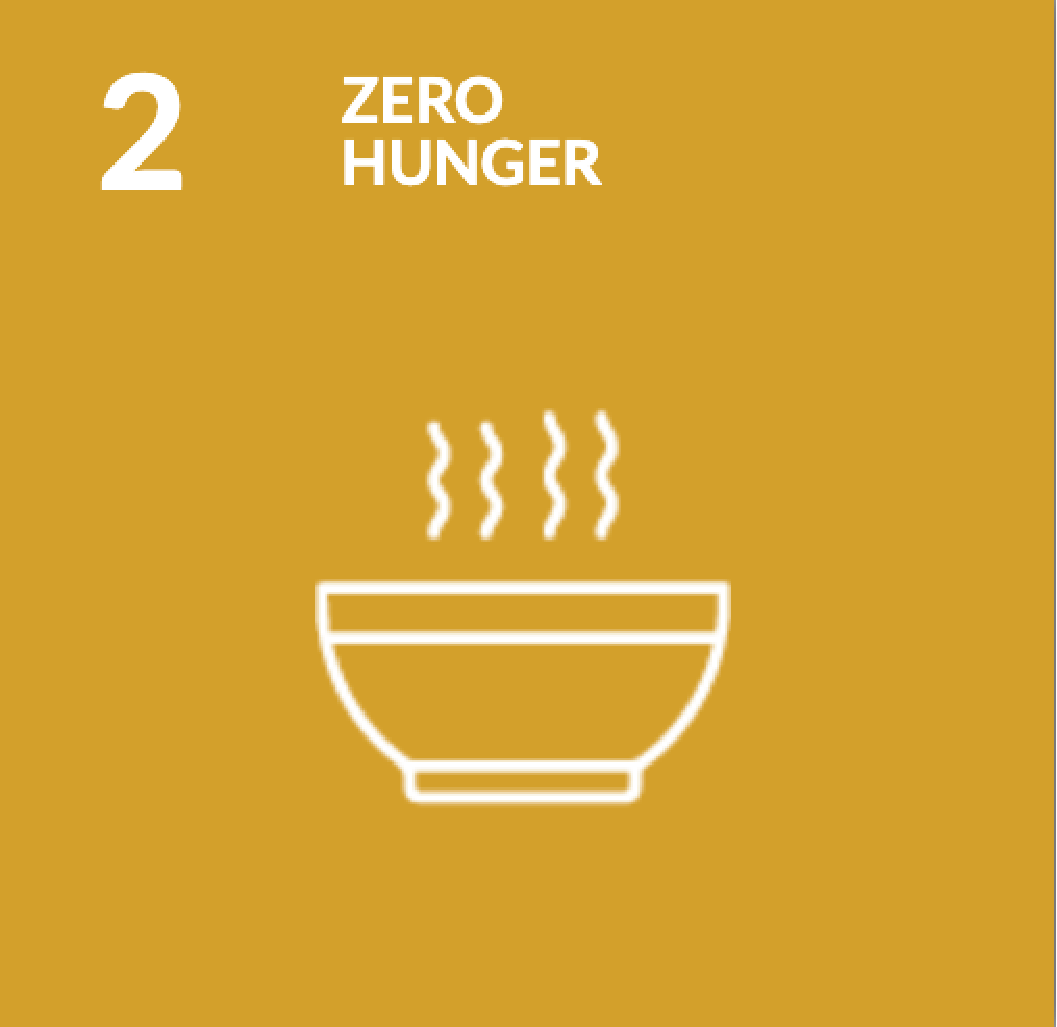

<Optimising maize crop yields in Sub-Saharan Africa in the context of climate change>

# Problem statement 

African countries have been suffering from food shortages for decades, and all stakeholders are trying to find a solution to this age-old problem. With climate change, agricultural yields are decreasing significantly. In this project we will try to answer the following question: **"How can maize yields in sub-Saharan Africa be optimised in the context of climate change?"**.This project is focus on **SDG2** and **SDG13**,it aims is to improve maize yields in the context of extreme climate change in sub-Saharan Africa. More specifically, it aims to:
- Map the climatic environment of sub-Saharan Africa;
- Describe maize crop yields by sub-region (Central, West, East Africa, etc.);
- Assess the impact of climate change on maize yields;
- Predict maize yields as a function of climatic events.
> We will use machine learning ,specifically  supervised learning **(Linear Regression and Random Forest)** to answer our research question.

## Import the packages 

In [8]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import plotly.express as px
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import tensorflow as tf
from plotly.offline import init_notebook_mode
plt.style.use("seaborn-dark")
init_notebook_mode (connected=True)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
warnings.simplefilter(action="ignore", category=FutureWarning)
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor

C:\Users\Yssoufa Thabiti\AppData\Local\Temp\ipykernel_19164\3906678164.py:20: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



# Data Preparation 

### import the data 

> We create a function called **wrangle** to import to clean and wrangle the datasets inside it. 

In [48]:
def wrangle (path):
    df=pd.read_csv(path)
    #df.drop(columns=[Unnamed],inplace=True)
    df=df.rename(columns={'ISO code':"iso3"})
    df.drop(columns=['country'],inplace=True)
    #q1,q9=df['cerealyield'].quantile([0.1,0.9])
    #mask_cereal=df['cerealyield'].between(q1,q9)
    #df=df[mask_cereal]
    #Delate leakage futures
    #df.drop(columns=['yMaize','yMaize','ysorgho'])
    return df

In [49]:
# Use the function to import the cleaning datasets
df=wrangle('data_clean.csv')

### Explore

In [11]:
df.head()

,iso3,agriland,urbpop,urbgrowth,popgrowth,AGFOFI,AGFOFI2,freshwith,CO2,electric,renew_energy,cerealyield,precipitation,forestarea,arabland,yMaize,yrice,ysorgho
0,AGO,36.810780,4.242778,66.825,3.268348,2.843708,9.946544,0.476824,19814.500,46.955444,61.02,992.5,1010,53.426951,4.305767,10993.0,12375.00000,2286.0
1,BWA,45.633723,2.850621,70.877,1.850986,-2.654550,2.208063,9.184483,5763.687,71.829124,27.21,1034.7,416,26.917050,0.458772,6670.0,22681.24324,17876.0
2,BFA,46.103801,4.758616,30.607,2.688788,5.146184,18.398079,6.544000,5456.700,18.467279,67.51,1261.7,748,22.720760,21.944444,17625.0,22377.00000,10605.0
3,BDI,80.841121,5.393633,13.708,2.867082,2.800360,28.624950,2.784294,713.466,9.100000,83.52,1261.7,1274,10.889408,48.403427,11607.0,30089.00000,5319.0
4,CMR,20.625754,3.745673,57.560,2.711854,1.361914,17.496865,0.398681,9928.400,64.311874,78.94,1665.8,1604,43.029511,13.115864,17694.0,12327.00000,16994.0


In [12]:
print("The shape of data is :",df.shape)
df.info()

The shape of data is : (42, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   iso3           42 non-null     object 
 1   agriland       42 non-null     float64
 2   urbpop         42 non-null     float64
 3   urbgrowth      42 non-null     float64
 4   popgrowth      42 non-null     float64
 5   AGFOFI         42 non-null     float64
 6   AGFOFI2        42 non-null     float64
 7   freshwith      42 non-null     float64
 8   CO2            42 non-null     float64
 9   electric       42 non-null     float64
 10  renew_energy   42 non-null     float64
 11  cerealyield    42 non-null     float64
 12  precipitation  42 non-null     int64  
 13  forestarea     42 non-null     float64
 14  arabland       42 non-null     float64
 15  yMaize         42 non-null     float64
 16  yrice          42 non-null     float64
 17  ysorgho        42 non-nu

The target value is numeric and all explanatory variables are also numerci.

In [13]:
print(df.isna().sum())

iso3             0
agriland         0
urbpop           0
urbgrowth        0
popgrowth        0
AGFOFI           0
AGFOFI2          0
freshwith        0
CO2              0
electric         0
renew_energy     0
cerealyield      0
precipitation    0
forestarea       0
arabland         0
yMaize           0
yrice            0
ysorgho          0
dtype: int64


- There is not NA ovservations

In [14]:
#cheick the hape of the dataframe
print("The shape of data is:",df.shape)

The shape of data is: (42, 18)


In [15]:
#cheik the duplication
print("Dunplicated:",df.duplicated().sum())

Dunplicated: 0


#### Cheick the cordinality

In [16]:

df.select_dtypes('object').nunique()

iso3    42
dtype: int64

#### Explanatory analysis

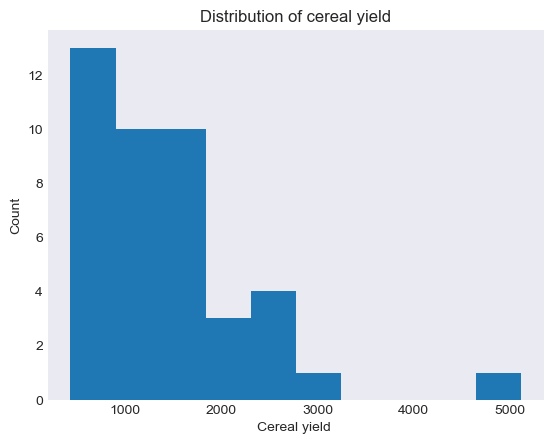

In [17]:
plt.hist(df["cerealyield"])
plt.xlabel("Cereal yield ")
plt.ylabel("Count")
plt.title("Distribution of cereal yield");

- The distribution of targt variable is not normal.

C:\Users\Yssoufa Thabiti\AppData\Local\Temp\ipykernel_19164\1194415228.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




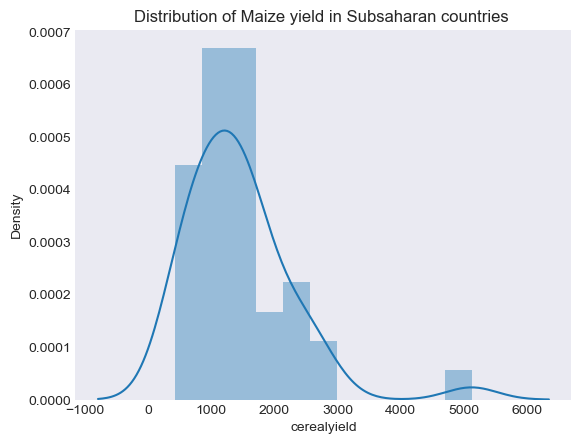

In [18]:
# Data distribution
plt.title('Distribution of Maize yield in Subsaharan countries ')
sns.distplot(df['cerealyield'])
plt.show();

- The distribution is not far from the normality

In [19]:
#Calculate the mean of maize by country
mean_cerealyield_by_state=df.groupby('iso3')['cerealyield'].mean().sort_values(ascending=True)

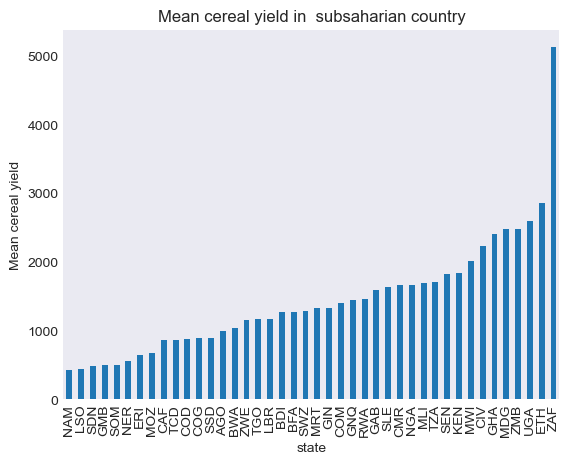

In [20]:
#Create a bar plot to show the mean of maize yield by subsabaran countries
mean_cerealyield_by_state.plot(
       kind="bar",
       xlabel="state",
       ylabel="Mean cereal yield",
       title="Mean cereal yield in  subsaharian country"
);

> The plot clearly states that South Africa has the highest mean of cereal yiled than any subsaharan country.Namibia reprente small quantity cereal yield which is explain by secheresse.

In [21]:
#Create a plot to show the total of maize yield by subsabaran countries
country_maize_yield = df.groupby('iso3').sum()[['cerealyield']].sort_values('cerealyield', ascending = False).reset_index().head(10)
fig=px.scatter(country_maize_yield,
               x ='iso3', y = 'cerealyield',
               template = 'plotly_dark', color = 'iso3', 
               size = 'cerealyield' , opacity = 0.85,
               title="<b>Total cereal yield in 10 Subsaharian countries networth ")
fig.show()

> The graph shows clearly the darker of country is the greater maize yield in subsaharian countries.It informs that **South Africa**,**Ethiopia** ,**Uganda** and **Zambia** are the top 3 African subsaharan countries wich have greater maize yiled in 2020.

In [22]:
def build_nat_choropleth():
    fig = px.choropleth(
        data_frame=df,
        locations="iso3",
        color="cerealyield",
        projection="natural earth",
        color_continuous_scale=px.colors.sequential.Oranges,
        title="Cereal yield in Subsaharan Africa"
        
    )
    return fig
nat_fig = build_nat_choropleth()
print("nat_fig type:", type(nat_fig))
nat_fig.show();

nat_fig type: <class 'plotly.graph_objs._figure.Figure'>


> The map shows clearly the darker of country is the greater maize yield in subsaharian countries.It informs that **South Africa** had the highest value of cereal yoeld in 2020.

In [23]:
#describe Maize
df['cerealyield'].describe().apply("{0:.0f}".format)

count      42
mean     1443
std       863
min       430
25%       881
50%      1304
75%      1695
max      5121
Name: cerealyield, dtype: object

> The subsaharan countries have 1443 average 100g/ha of cereal yiled.Less than 25 % african countries have 881 100g/ha cereal yield.Greater than 75 % have 1695 100g/ha cereal yield.The avrage and median values are not close ,so the cereal yield is not normaly distributed.

In [24]:
#Statistics descriptive of all the variables
df.describe()

,agriland,urbpop,urbgrowth,popgrowth,AGFOFI,AGFOFI2,freshwith,CO2,electric,renew_energy,cerealyield,precipitation,forestarea,arabland,yMaize,yrice,ysorgho
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,49.793120,3.712192,42.531786,2.459333,3.702992,20.885123,33.510159,17797.097929,47.932419,66.510476,1443.282927,1018.500000,28.679374,15.154216,16244.375000,22681.243243,9741.405405
std,21.308865,0.898562,17.789612,0.620384,4.771402,11.783123,114.180843,61843.231416,22.891321,23.754720,862.773458,588.881091,23.589890,14.884298,9921.028536,12088.803071,6404.008225
min,3.740463,1.728736,13.708000,0.939644,-7.543970,2.208063,0.020721,236.600000,7.260934,6.970000,429.500000,92.000000,0.303483,0.436596,4569.000000,4834.000000,1860.000000
25%,36.791114,3.102570,29.116000,2.039944,1.765712,12.468506,0.834369,1586.300000,30.959287,52.560000,880.850000,636.750000,10.891222,4.507255,9135.250000,13991.750000,5722.250000
50%,48.833437,3.661919,42.499000,2.523172,3.702992,20.885123,4.284811,4250.550000,49.271347,73.025000,1304.400000,1015.000000,23.233273,10.315311,15432.000000,22681.243240,9015.000000
75%,70.044310,4.243969,52.075000,2.839506,4.833575,26.102104,9.049858,9524.425000,63.783500,83.267500,1695.300000,1325.750000,42.748630,20.394262,18149.750000,29247.250000,10385.500000
max,80.841121,5.737879,90.092000,3.727101,17.206766,59.487396,673.375000,393241.600000,91.062843,96.160000,5120.600000,2526.000000,91.320681,49.233887,54478.000000,63973.000000,37176.000000


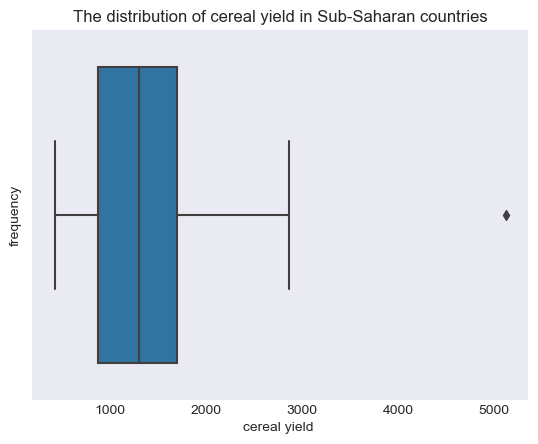

In [25]:
#sns.boxplot(x=df[features])
   # plt.title(feature);
sns.boxplot(x=df['cerealyield'])
plt.xlabel("cereal yield ")
plt.ylabel("frequency")
plt.title("The distribution of cereal yield in Sub-Saharan countries");

- cereal yield does not have outliers 

### Cheick multicolinearity

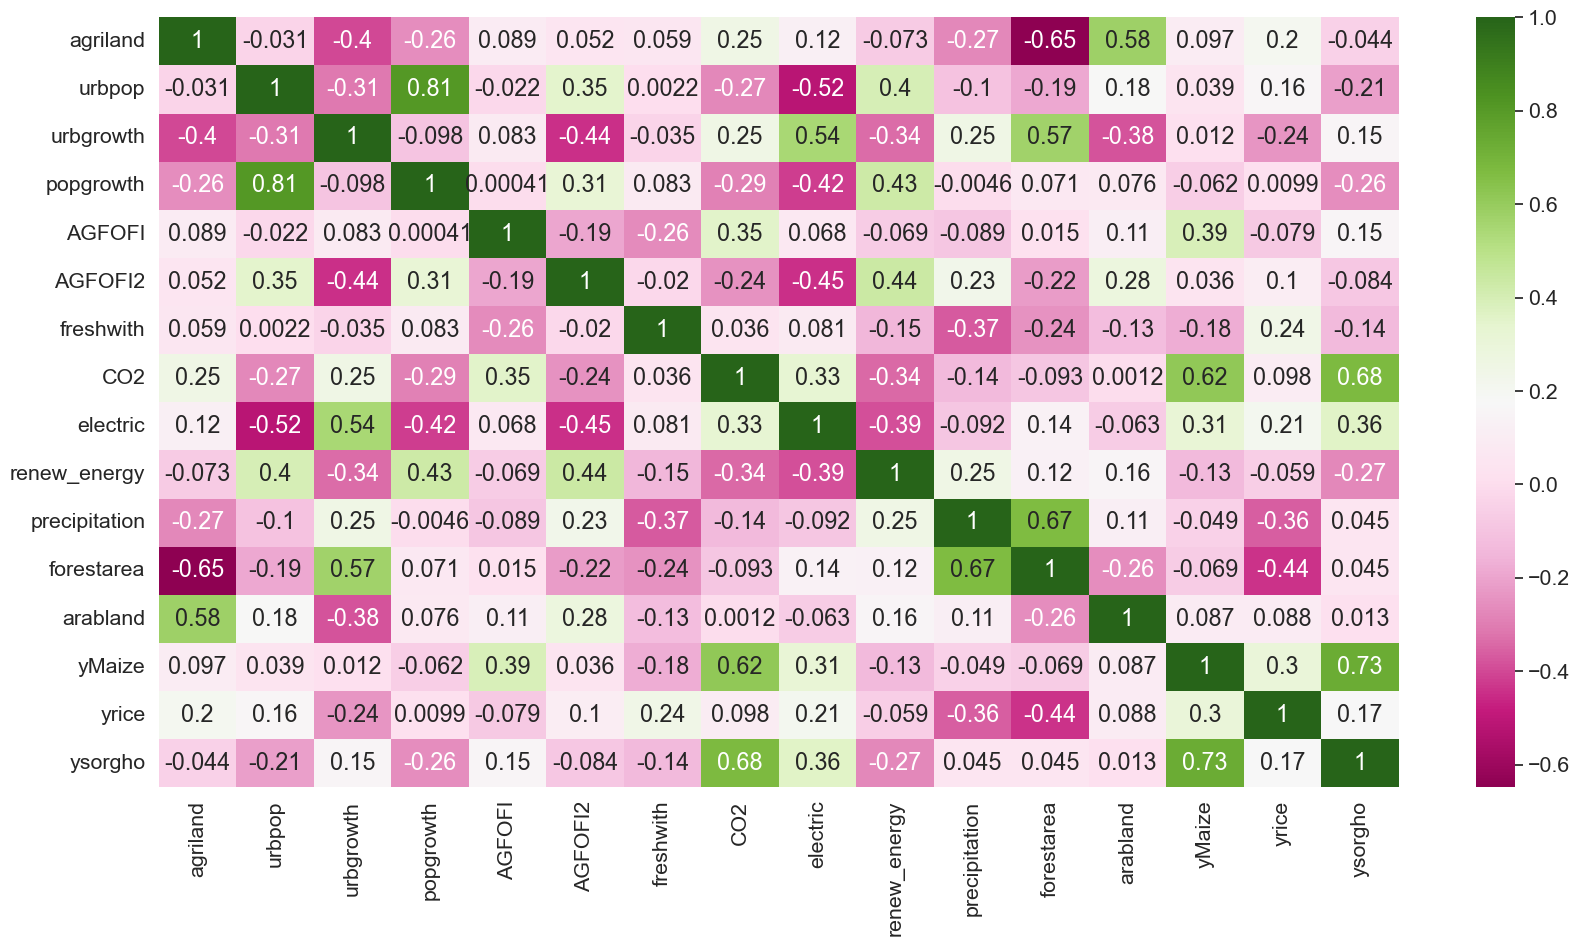

In [26]:
# Show the correlation of explonatory variables
corr=df.select_dtypes("number").drop(columns="cerealyield").corr()
sns.set(font_scale=1.4)
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap='PiYG',annot=True);

> The heatmap show clearly multicolinearity of explanatory variables.

In [27]:
## We show the correlation of target variable and each explanatory variable
corr2=df.select_dtypes("number").corr()
round(corr2,3)

,agriland,urbpop,urbgrowth,popgrowth,AGFOFI,AGFOFI2,freshwith,CO2,electric,renew_energy,cerealyield,precipitation,forestarea,arabland,yMaize,yrice,ysorgho
agriland,1.000,-0.031,-0.402,-0.260,0.089,0.052,0.059,0.251,0.121,-0.073,0.174,-0.275,-0.649,0.576,0.097,0.204,-0.044
urbpop,-0.031,1.000,-0.308,0.807,-0.022,0.348,0.002,-0.271,-0.517,0.398,-0.037,-0.102,-0.186,0.180,0.039,0.157,-0.213
urbgrowth,-0.402,-0.308,1.000,-0.098,0.083,-0.444,-0.035,0.249,0.543,-0.338,0.105,0.248,0.571,-0.385,0.012,-0.242,0.153
popgrowth,-0.260,0.807,-0.098,1.000,0.000,0.315,0.083,-0.293,-0.420,0.432,-0.132,-0.005,0.071,0.076,-0.062,0.010,-0.257
AGFOFI,0.089,-0.022,0.083,0.000,1.000,-0.194,-0.264,0.355,0.068,-0.069,0.315,-0.089,0.015,0.105,0.388,-0.079,0.153
AGFOFI2,0.052,0.348,-0.444,0.315,-0.194,1.000,-0.020,-0.243,-0.449,0.437,-0.083,0.231,-0.222,0.283,0.036,0.103,-0.084
freshwith,0.059,0.002,-0.035,0.083,-0.264,-0.020,1.000,0.036,0.081,-0.149,-0.158,-0.369,-0.244,-0.126,-0.177,0.244,-0.136
CO2,0.251,-0.271,0.249,-0.293,0.355,-0.243,0.036,1.000,0.329,-0.342,0.687,-0.138,-0.093,0.001,0.615,0.098,0.675
electric,0.121,-0.517,0.543,-0.420,0.068,-0.449,0.081,0.329,1.000,-0.387,0.335,-0.092,0.136,-0.063,0.311,0.208,0.360
renew_energy,-0.073,0.398,-0.338,0.432,-0.069,0.437,-0.149,-0.342,-0.387,1.000,-0.149,0.247,0.124,0.155,-0.135,-0.059,-0.271


Important correlations with the target variable:
- cerealyield and AGFOFI (-0.315)
- cereal yield and co2 (0.687)
- cereal yield and electricity (0.335)
- cereal yield and Ymaize (0.877)
- Cereal yield and ysorgo (0.743)
> Highly correlated explanatory's feature beyong 60% :
- Agriland and forestry (-0.649)
- urbpop and popgrowth (0.807)
- co2 and ysorgho (0.675)
- Precipitation and forest area (0.732)
- yMaize and ysorgho (0.666)
> We ramark that most explanatory features are highly correlated each other,so we will include in our model only features which have upt to **10%** or **-10%** correlation proportion values and  delate leakage features like **yMaize**,**yrice** and **ysargho**.
So we delate **(yMaize,yrice,feat5,ysargho,feat10,AGFOFI2,forestarea,urbpop)**

In [50]:
# Our final DataFrame to modeling
df.drop(columns=['yMaize','yrice','ysorgho','AGFOFI2','forestarea','urbpop'],inplace=True)

In [29]:
df.head()

,iso3,agriland,urbgrowth,popgrowth,AGFOFI,freshwith,CO2,electric,renew_energy,cerealyield,precipitation,arabland
0,AGO,36.810780,66.825,3.268348,2.843708,0.476824,19814.500,46.955444,61.02,992.5,1010,4.305767
1,BWA,45.633723,70.877,1.850986,-2.654550,9.184483,5763.687,71.829124,27.21,1034.7,416,0.458772
2,BFA,46.103801,30.607,2.688788,5.146184,6.544000,5456.700,18.467279,67.51,1261.7,748,21.944444
3,BDI,80.841121,13.708,2.867082,2.800360,2.784294,713.466,9.100000,83.52,1261.7,1274,48.403427
4,CMR,20.625754,57.560,2.711854,1.361914,0.398681,9928.400,64.311874,78.94,1665.8,1604,13.115864


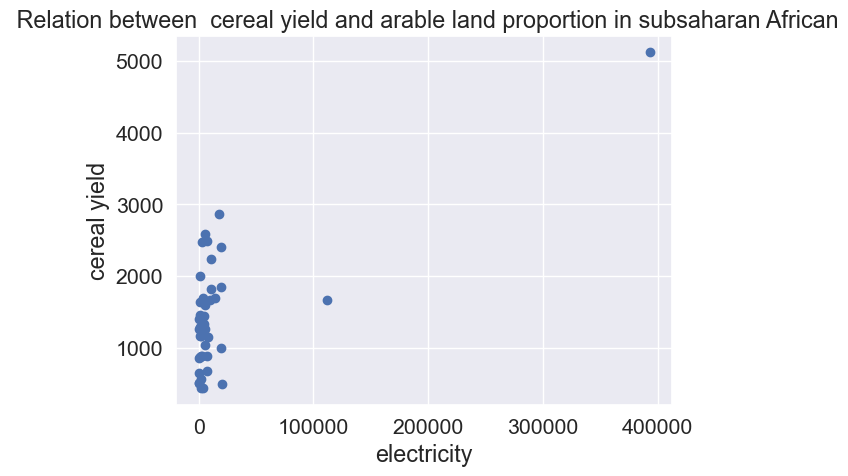

In [30]:
# relation between target variabe and proportion of arable land
plt.scatter(x=df['CO2'],y=df['cerealyield'])
plt.xlabel('electricity')
plt.ylabel('cereal yield')
plt.title(' Relation between  cereal yield and arable land proportion in subsaharan African');

> The graph shows a positive linear correlation between cereal yield and CO2.The greater CO2 emission  in a country, the greater the cereal yield from maize.

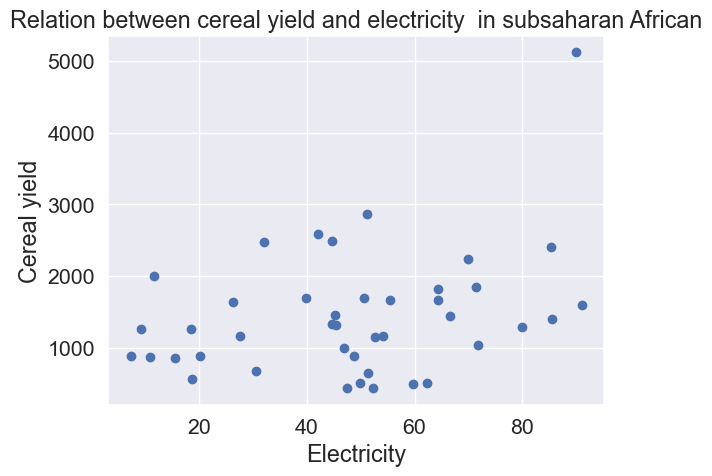

In [31]:
# relation between target variabe and Agriculture land per square
plt.scatter(x=df['electric'],y=df['cerealyield'])
plt.xlabel('Electricity')
plt.ylabel('Cereal yield')
plt.title('Relation between cereal yield and electricity  in subsaharan African');

> The graph shows a positive linear correlation between cereal yield and electricy.The grater electricy in Subsaharan country  , the greater the yield from cereal yield.

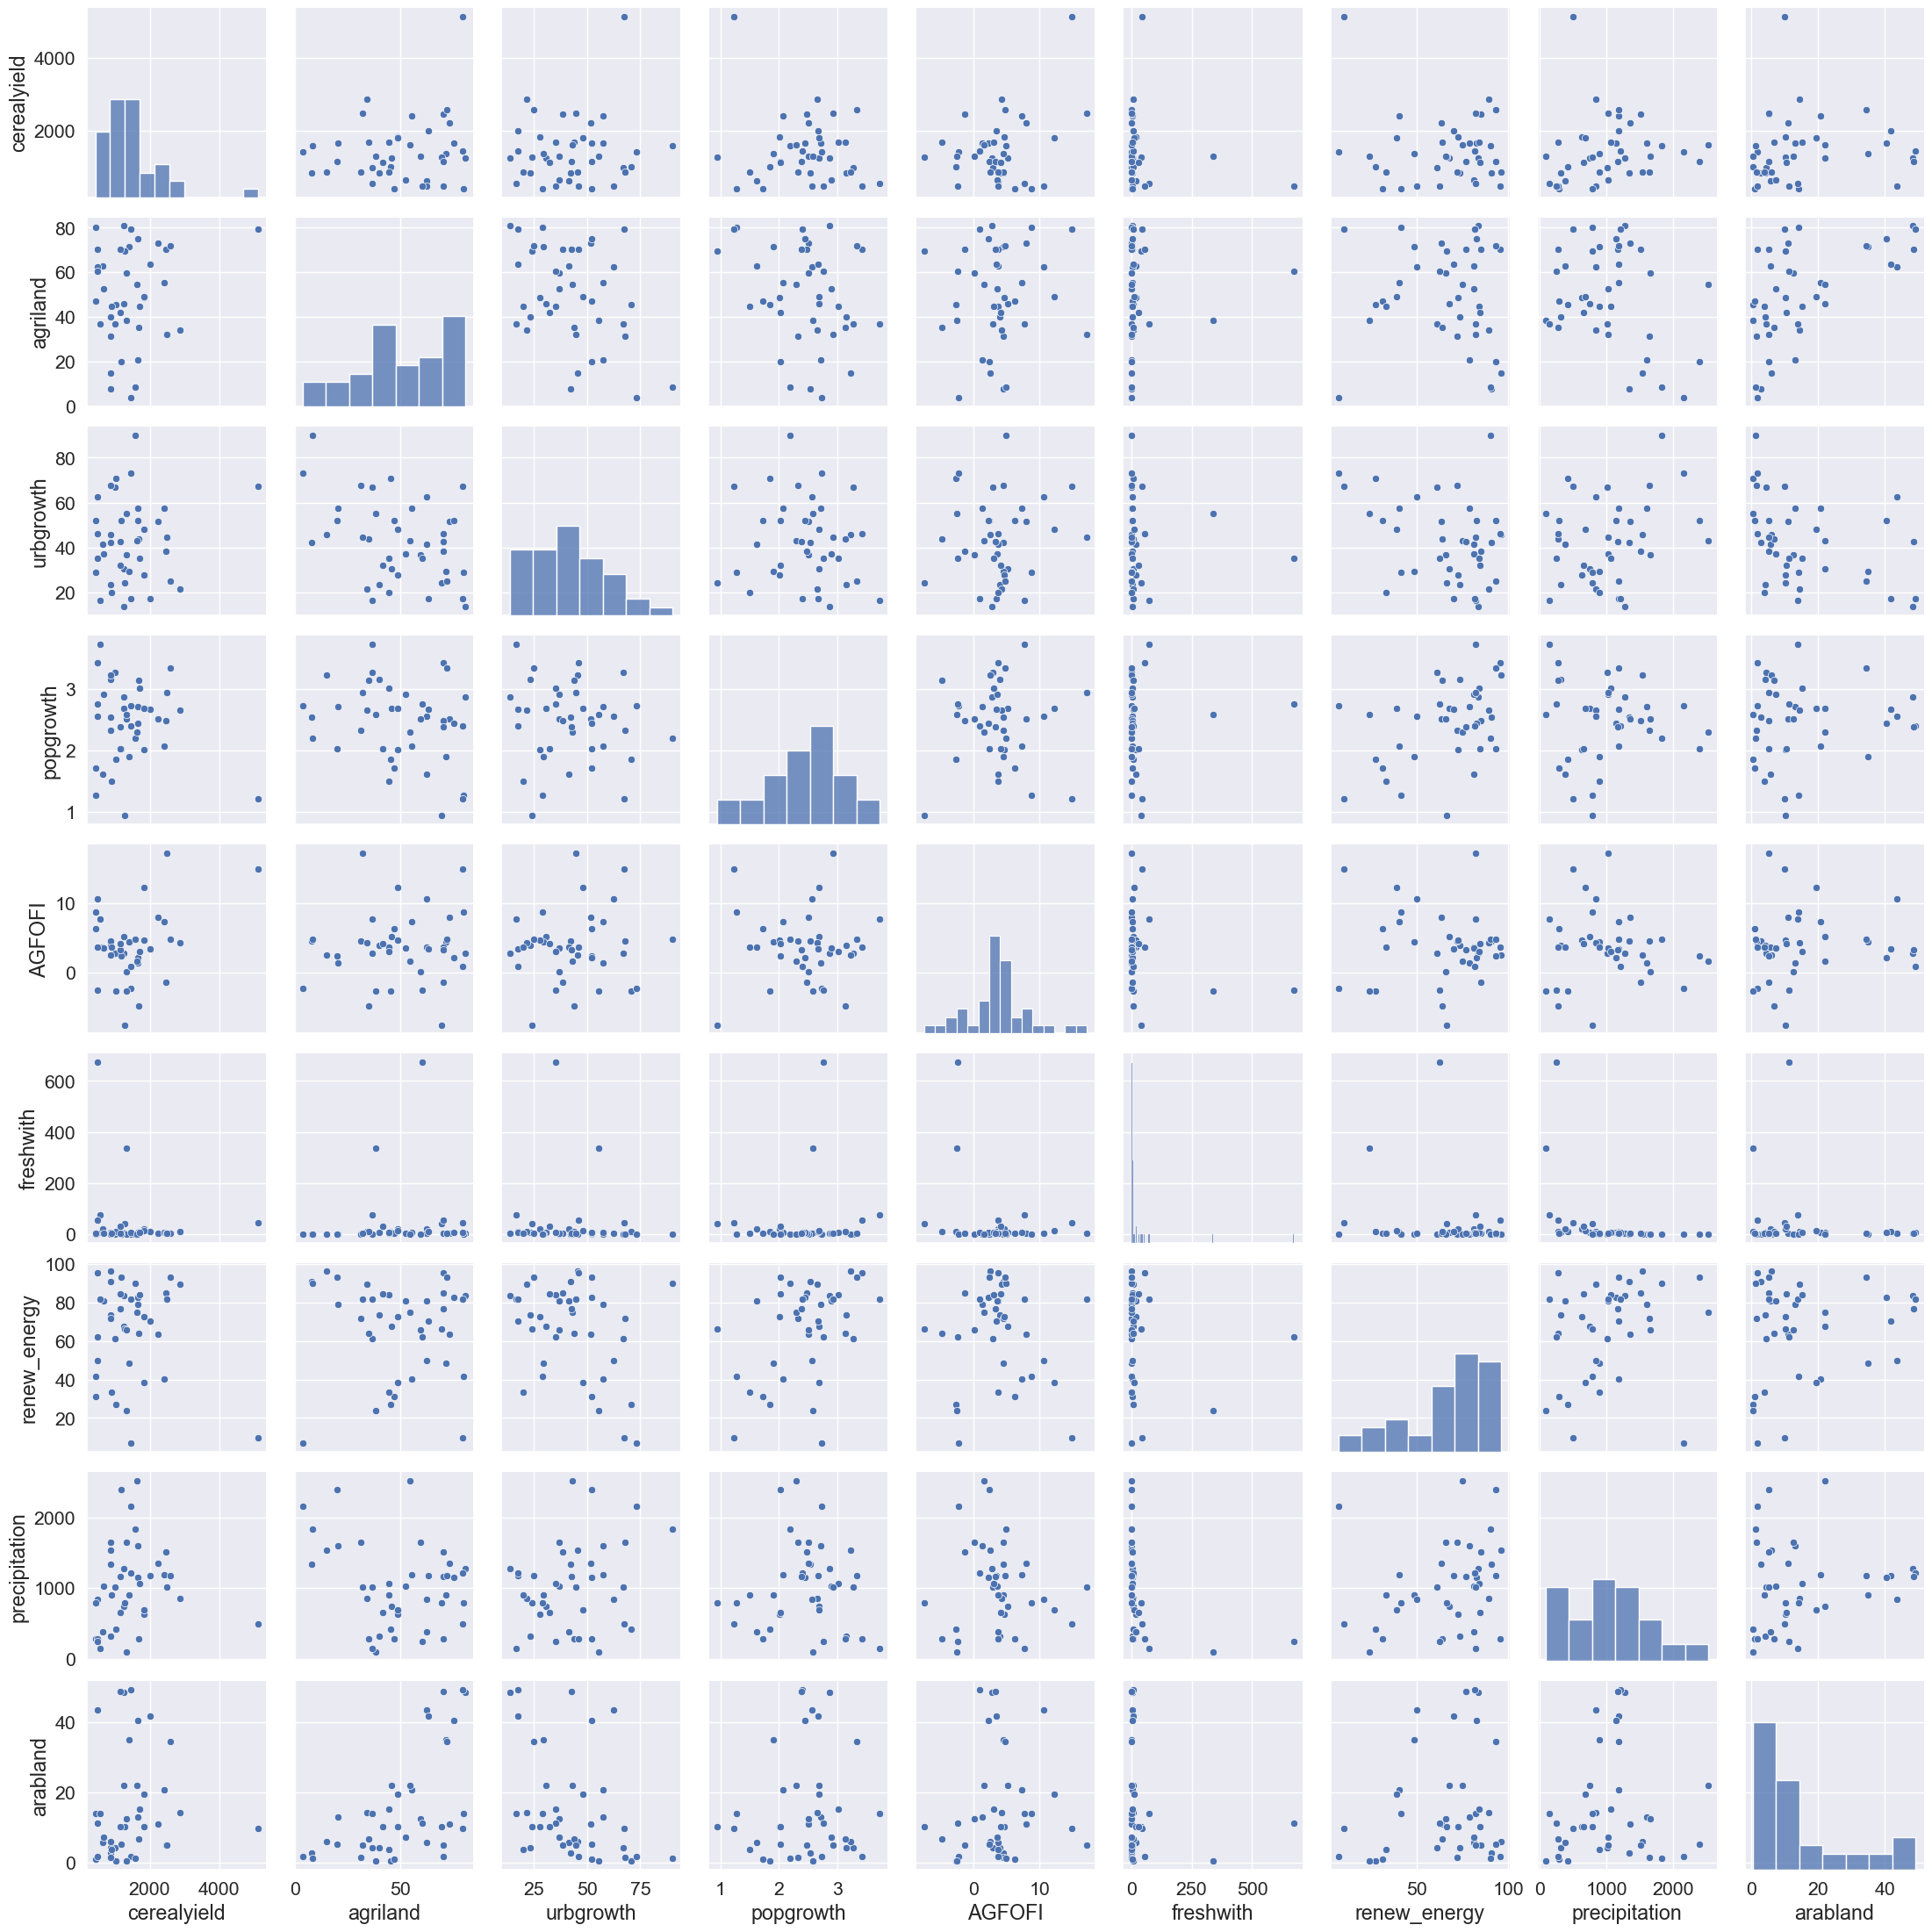

In [32]:
# Use the pairplot to cheick linear correlaion between other explanatory variables and the targer variable (cereal yield)
sns.pairplot(df[['cerealyield','agriland','urbgrowth','popgrowth','AGFOFI','freshwith','renew_energy','precipitation','arabland']])

> The pairplot detect linearity correlation between target variables and explanatory variables.So we can apply **mulpltilinear Regression**.Furthermore the variables are not normaly distribution.

In [51]:
# Create an other dataFreame by coping the true dataframe
df2=df.copy()

In [52]:
#Set index iso3 as it is categorical variable 
df2=df2.set_index('iso3')

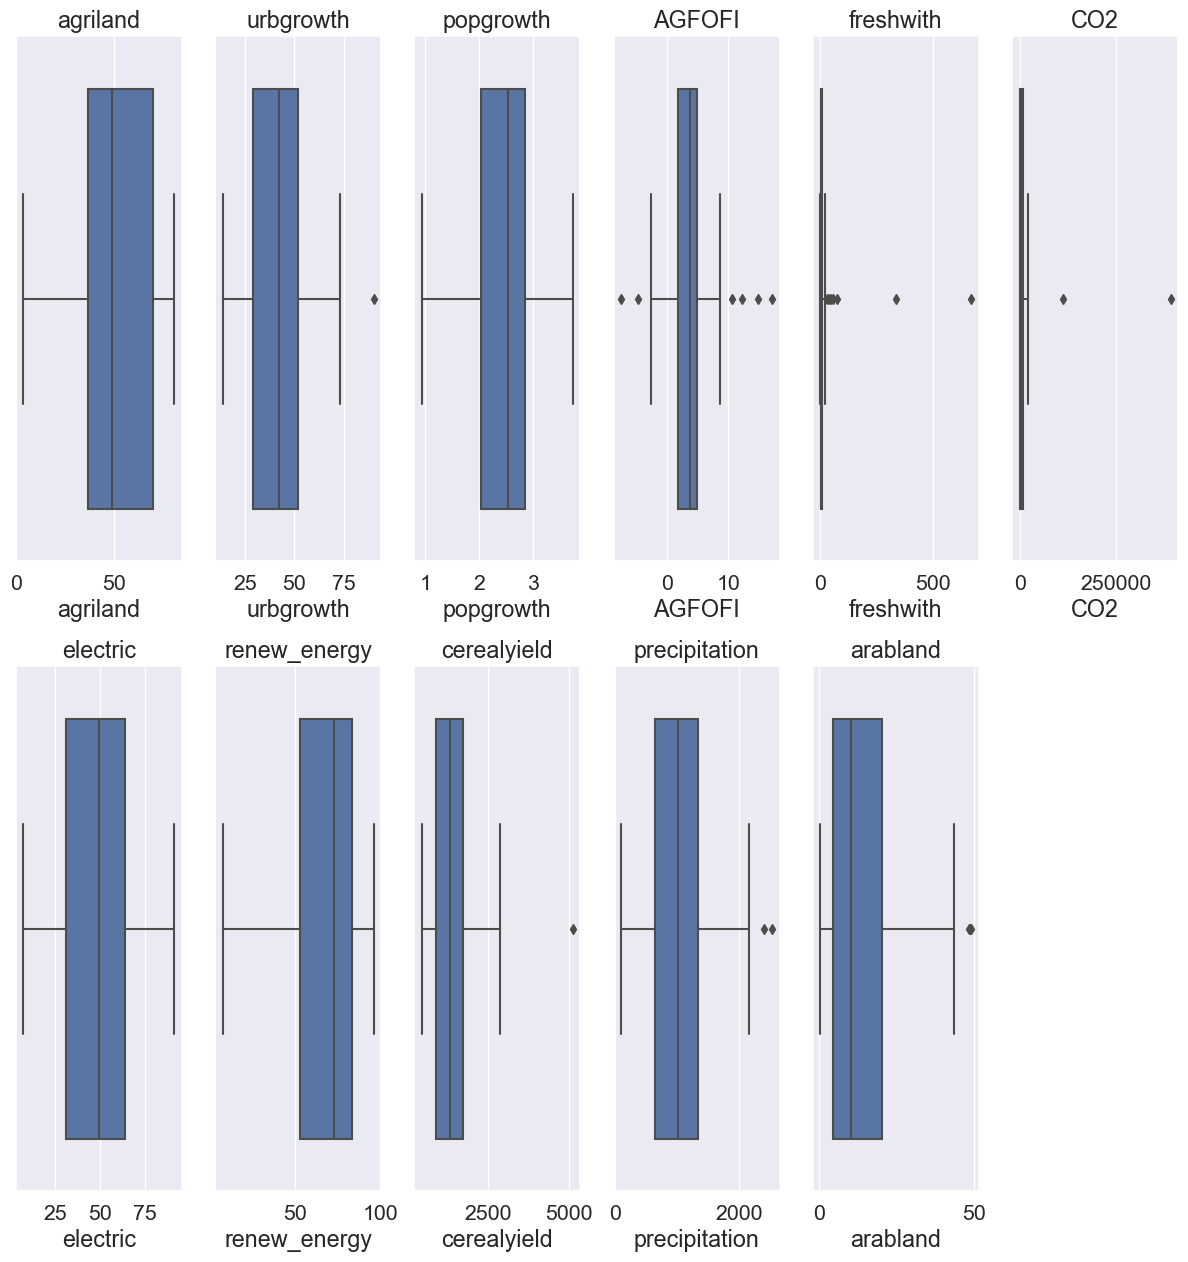

In [35]:
#Cheick outliers by using boxplot
plt.figure(figsize=(15,15))
for i,feature in enumerate(df2):
    plt.subplot(2,6,i+1)
    sns.boxplot(x=df2[feature])
    plt.title(feature);

> The boxplots show outliers on **[feat2,feat3,feat6,feat8]** .

C:\Users\Yssoufa Thabiti\AppData\Local\Temp\ipykernel_19164\2561529570.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Yssoufa Thabiti\AppData\Local\Temp\ipykernel_19164\2561529570.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Yssoufa Thabiti\AppData\Local\Temp\ipykernel_19164\2561529570.py:5:

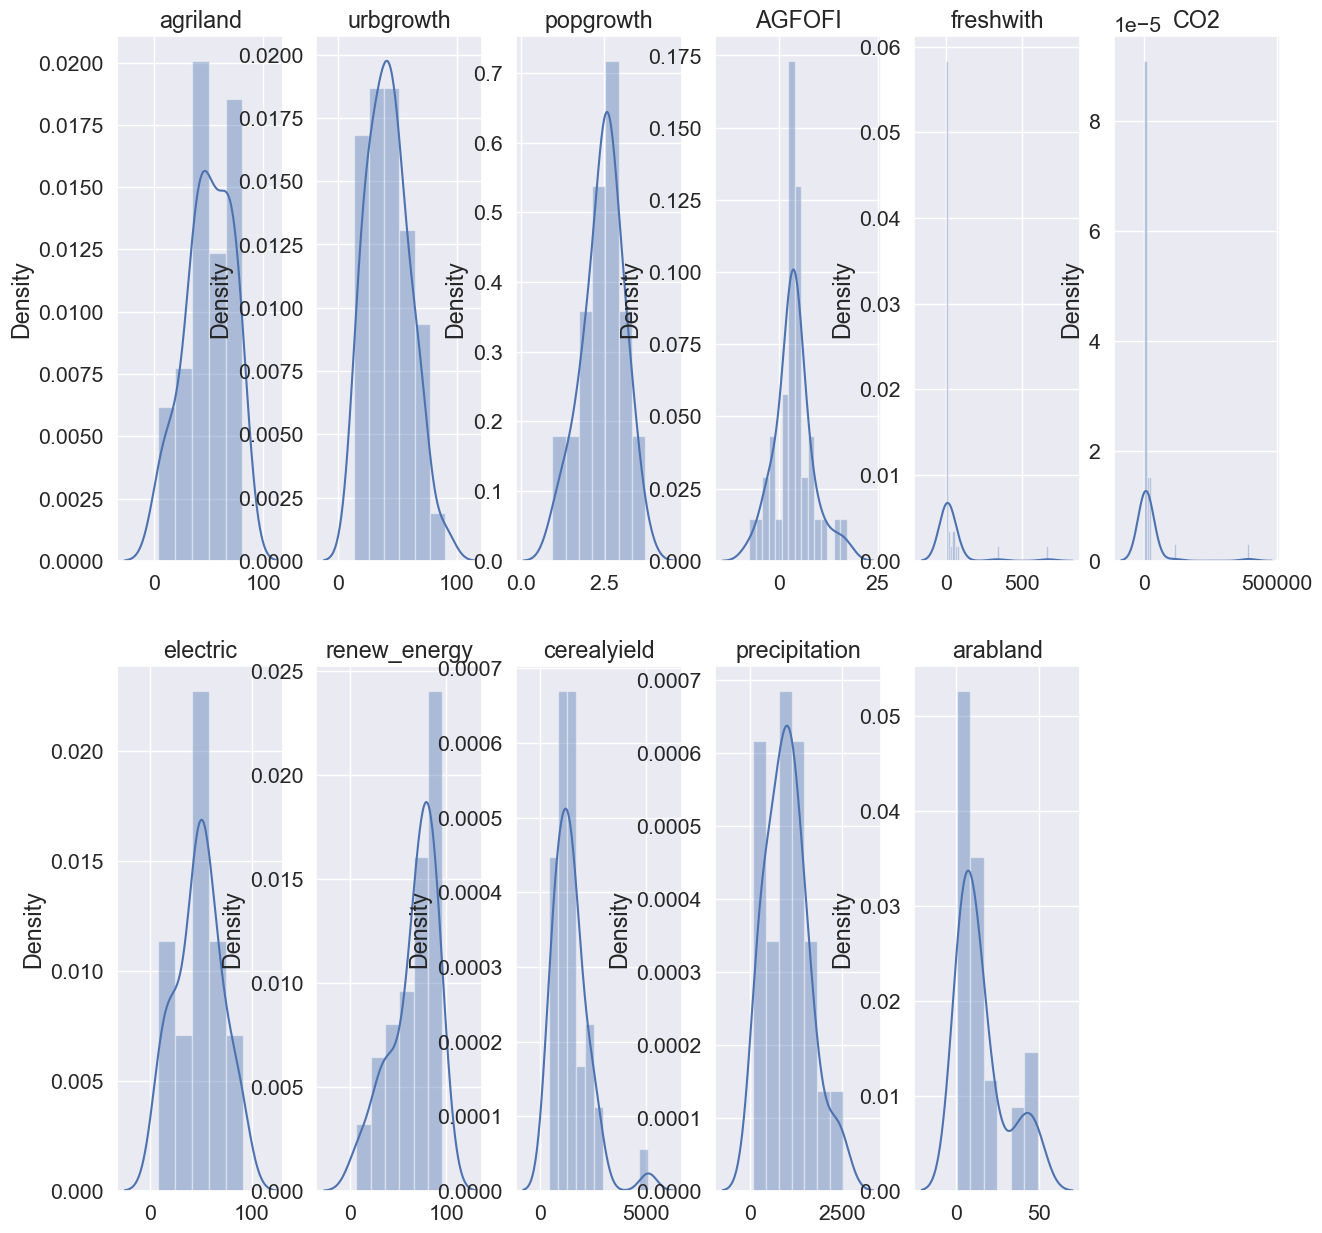

In [36]:
#Cheick the distribution of the variables by using density plot 
plt.figure(figsize=(15,15))
for i,feature in enumerate(df2):
    plt.subplot(2,6,i+1)
    sns.distplot(x=df2[feature])
    plt.title(feature)
    

> The density plots show that most of explanatory variables are not normaly distributed. The next step we will perform **Future Scaling** for randomizing the variable .

#### Future scaling

> using StandardScaler to eleminate the outliers and randomizing the features

In [53]:
scaler=StandardScaler()
df[['agriland', 'urbgrowth', 'popgrowth', 'AGFOFI', 'freshwith','CO2', 'electric', 'renew_energy', 'cerealyield', 'precipitation','arabland']]=scaler.fit_transform(
df[[ 'agriland', 'urbgrowth', 'popgrowth', 'AGFOFI', 'freshwith','CO2', 'electric', 'renew_energy', 'cerealyield', 'precipitation', 'arabland']])

# LINEAR REGRESSION MODEL

## Split data

In [ ]:
#X=df.drop(columns=('maize'))
#y=df['maize']

In [54]:
target = "cerealyield"
features=['iso3','agriland','urbgrowth','popgrowth','AGFOFI','freshwith','CO2','electric','renew_energy','cerealyield','precipitation','arabland']
X_train=df[features]
y_train=df[target]

In [55]:
print("The shape of x_train is:",X_train.shape)

The shape of x_train is: (42, 12)


In [56]:
print("The shape of y_test is:",y_train.shape)

The shape of y_test is: (42,)


## Build te model

### Baseline

In [57]:
y_mean=y_train.mean()
y_pred_baseline=[y_mean]*len(y_train)
print("Mean maize yield:",round(y_mean,2))

print("Baseline MAE:", round(mean_absolute_error(y_train,y_pred_baseline),2))

Mean maize yield: 0.0
Baseline MAE: 0.71


In [58]:

model=LinearRegression()

In [59]:
#make insistiation
ohe=OneHotEncoder(use_cat_names=True)
#fit ohe
ohe.fit(X_train)
#Transform
XT_train=ohe.transform(X_train)
print(XT_train.shape)
XT_train.head()

(42, 53)


,iso3_AGO,iso3_BWA,iso3_BFA,iso3_BDI,iso3_CMR,iso3_CAF,iso3_TCD,iso3_COM,iso3_COD,iso3_COG,...,urbgrowth,popgrowth,AGFOFI,freshwith,CO2,electric,renew_energy,cerealyield,precipitation,arabland
0,1,0,0,0,0,0,0,0,0,0,...,1.382137,1.319863,-0.182273,-0.292814,0.033017,-0.043196,-0.233934,-0.528815,-0.014609,-0.737687
1,0,1,0,0,0,0,0,0,0,0,...,1.612672,-0.992485,-1.348577,-0.215628,-0.196938,1.056574,-1.674482,-0.479310,-1.035529,-0.999280
2,0,0,1,0,0,0,0,0,0,0,...,-0.678448,0.374342,0.306133,-0.239033,-0.201962,-1.302778,0.042587,-0.213015,-0.464914,0.461731
3,0,0,0,1,0,0,0,0,0,0,...,-1.639900,0.665220,-0.191468,-0.272360,-0.279589,-1.716945,0.724728,-0.213015,0.439133,2.260923
4,0,0,0,0,1,0,0,0,0,0,...,0.855015,0.411973,-0.496595,-0.293507,-0.128779,0.724205,0.529587,0.261035,1.006311,-0.138607


In [45]:
imputer=SimpleImputer()

In [60]:
model=make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    Ridge()
)
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['iso3'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

> Split X and y into training and test sets. The first **80%** of the data should be in your training set. The remaining **20%** should be in the test set

In [61]:
x_train,x_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [62]:
y_pred=model.predict(x_test)

In [63]:
pd.DataFrame(list(zip(y_test,y_pred)),columns=['Actual Values','Predicted Values'])

,Actual Values,Predicted Values
0,-0.142512,-0.200491
1,-0.183336,-0.177175
2,-0.660906,-0.632192
3,-0.904677,-0.859547
4,0.261035,0.262340
5,1.341697,1.291021
6,0.468440,0.465864
7,0.262326,0.295178
8,0.018672,0.025897


> The predit values and actual values are almost smilar.

# Evaluate

 - Calculate the training mean absolute error for your predictions as compared to the true targets in y_train.

In [64]:
print("Training MAE:", mean_absolute_error(y_test,y_pred))

Training MAE: 0.025846205239162


In [65]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.0011076101901465693


In [66]:
print("RMSE:",np.sqrt(mean_absolute_error(y_test,y_pred)))

RMSE: 0.16076755033016457


## communicate Results

Text(0, 0.5, 'Predicted')

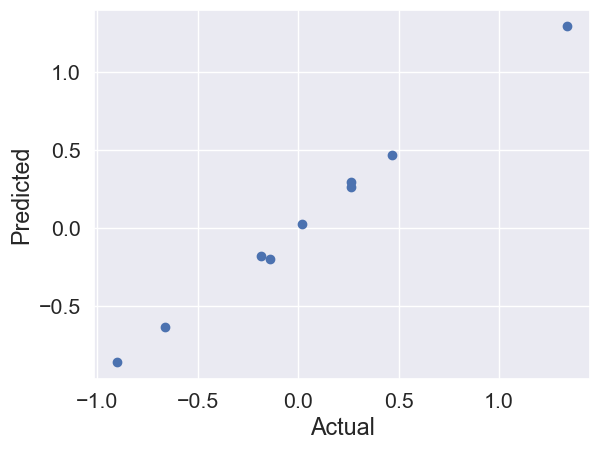

In [67]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted')

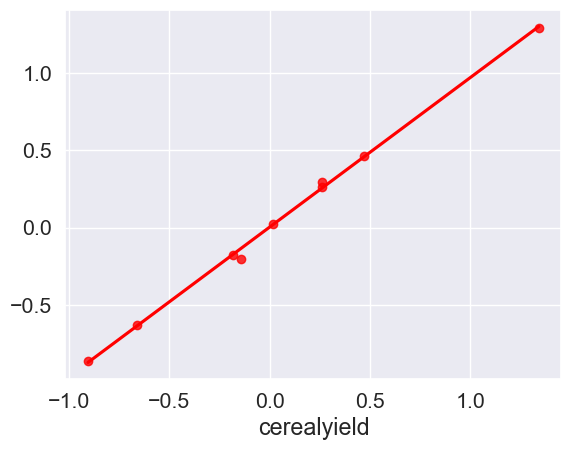

In [68]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [69]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
25,-0.142512,-0.200491,0.057979
13,-0.183336,-0.177175,-0.006161
8,-0.660906,-0.632192,-0.028714
26,-0.904677,-0.859547,-0.045130
4,0.261035,0.262340,-0.001304
39,1.341697,1.291021,0.050676
19,0.468440,0.465864,0.002576
29,0.262326,0.295178,-0.032852
30,0.018672,0.025897,-0.007225


# RandomForest 

In [72]:
#Randomizing the variables by using the SatandardScaler function in sickilearn for df2 
scaler=StandardScaler()
df2[['agriland', 'urbgrowth', 'popgrowth', 'AGFOFI', 'freshwith','CO2', 'electric', 'renew_energy', 'cerealyield', 'precipitation','arabland']]=scaler.fit_transform(
df2[[ 'agriland', 'urbgrowth', 'popgrowth', 'AGFOFI', 'freshwith','CO2', 'electric', 'renew_energy', 'cerealyield', 'precipitation', 'arabland']])

In [76]:
# Instiate the model 
model2=RandomForestRegressor (n_estimators=30,random_state=30)

In [73]:
X=df2[['agriland','urbgrowth','popgrowth','AGFOFI','freshwith','CO2','electric','renew_energy','precipitation','arabland']]
X=X[:int(len(df2)-1)]
y=df2['cerealyield']
y=y[:int(len(df2)-1)]

In [74]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [77]:
model2.fit(X,y) # Training the model 

RandomForestRegressor(n_estimators=30, random_state=30)

## Evaluate the model

In [78]:
# Test the model
ytrain_pred=model2.predict(X)
print("The model score is:",model2.score(X,y))

The model score is: 0.8628474369415416


In [79]:
from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(y,ytrain_pred)

0.27555264390332573

In [ ]:
# Prediction on train dataset
#ytrain_pred=model2.predict(X)

In [80]:
r2_score(y,ytrain_pred)

0.8628474369415416

In [81]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,ytrain_pred)

0.14008823485985158

In [82]:
print("RMSE:",np.sqrt(mean_absolute_error(y,ytrain_pred)))

RMSE: 0.5249310849086056


In [90]:
ytest_pred=model2.predict(X_test)

In [91]:
print(ytest_pred[:10])

[-0.1118392   0.14354129 -0.32432325 -0.29840941  0.31514272  0.95560191
  0.28684358  0.70868731  0.25298002]


In [92]:
mean_absolute_error(y_test,ytest_pred)

0.2618264732017345

In [86]:
#The testing of coefficient determination
print("The testing r_square is:",r2_score(y_test,ytest_pred))

The testing r_square is: 0.7258782390077596


In [87]:
model2.score(X_test,y_test)

0.7258782390077596

In [88]:
# Evaluate the model 
mean_absolute_error(y_test,ytest_pred)

0.2618264732017345

In [93]:
mean_squared_error(y_test,ytest_pred)

0.1008092571249236

In [94]:
print("RMSE:",np.sqrt(mean_absolute_error(y_test,ytest_pred)))

RMSE: 0.5116898212801722


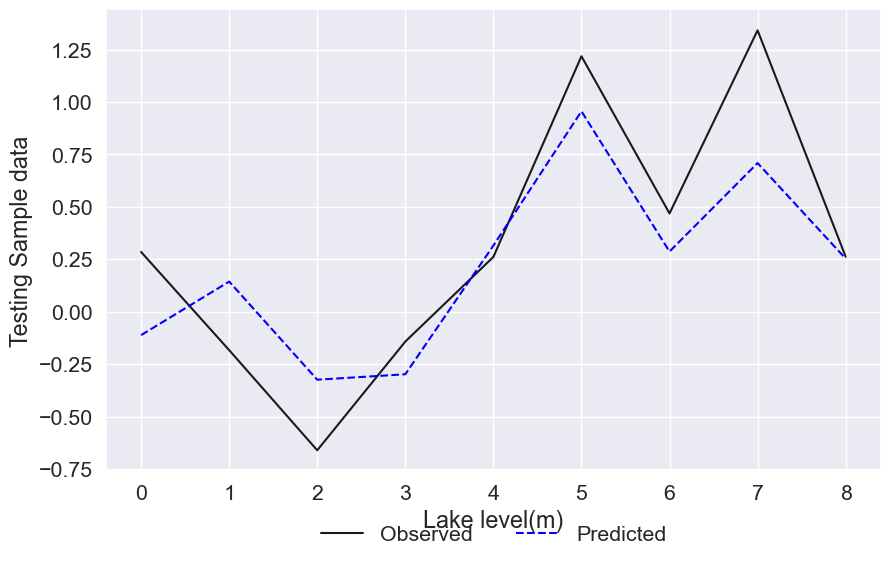

In [95]:
# Plotting the observed and predicted data
import matplotlib.pyplot as plt
# Setting the boundaries and parameters
plt.rcParams['figure.figsize']=(10,6)
x_ax=range(len(X_test))
#plotting
plt.plot(x_ax,y_test,label="Observed",color='k',linestyle='-')
plt.plot(x_ax,ytest_pred,label="Predicted",color='blue',linestyle='--')
plt.xlabel("Lake level(m)")
plt.ylabel("Testing Sample data")
plt.legend(bbox_to_anchor=(0.5,-0.2),loc='lower center',ncol=2,frameon=False);

Defaulting to user installation because normal site-packages is not writeable


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



0.7258782390077596

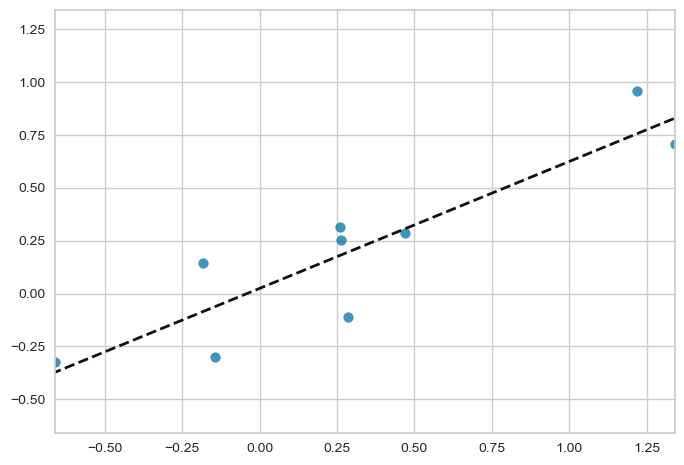

In [96]:
# plotting the prediction error
! pip install yellowbrick
from yellowbrick.regressor import PredictionError
visualizer=PredictionError(model2)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)

In [97]:
# The k-fold CV
from sklearn.model_selection import cross_val_score
#Training the model
score_train=cross_val_score(model2,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [98]:
score_train

array([-0.14934161, -0.44494169, -6.57652852, -0.23127168, -0.23209061,
       -0.22807787, -1.07765552, -1.54338361, -0.74399015, -1.86488932])

In [99]:
# The mean score
print(np.mean(score_train))

-1.3092170567276014


In [100]:
# The absolute mean score
from numpy import absolute
print(absolute(np.mean(score_train)))

1.3092170567276014


In [101]:
# test model Cross Validation
score_test=cross_val_score(model2,X_test,y_test,scoring='neg_mean_squared_error',cv=9)

In [102]:
score_test

array([-0.15275484, -0.18559401, -1.99326055, -0.34511199, -0.02531407,
       -0.37857491, -0.01622849, -0.92888303, -0.10793278])

In [103]:
# the mean of score test
print(np.mean(score_test))

-0.4592949637022384


In [104]:
# The absolute mean of score test
print(absolute(np.mean(score_test)))

0.4592949637022384


In [105]:
# Random Forest Feature Ranking
f_list=list(X.columns)
f_importance=pd.Series(model2.feature_importances_,index=f_list).sort_values(ascending=False)

In [106]:
print(f_importance)

CO2              0.357699
AGFOFI           0.137626
precipitation    0.112541
renew_energy     0.087607
popgrowth        0.060713
freshwith        0.060603
agriland         0.051264
electric         0.050237
arabland         0.048456
urbgrowth        0.033254
dtype: float64


# CONCLUSION 